In [1]:
# Importing necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Linear regression model
from sklearn.tree import DecisionTreeRegressor # decision tree regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # for evaluating the models
from sklearn.neighbors import KNeighborsRegressor # KNN regression model
from sklearn.svm import SVR # SVR regression model


warnings.filterwarnings('ignore')

# Setting default properties for Matplotlib to standardize the look of plots
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Saving images and visuals to local directory
from pathlib import Path

# Where to save the figures
IMAGES_PATH = Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Reading our csv data
cancer_df = pd.read_csv(r'C:\Users\Daye Erekosima\UDACITY\ud120-projects\survey lung cancer.csv') 

# Display at random 10 rows in our data frame
cancer_df.sample(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
90,F,62,1,1,1,2,1,1,1,2,2,1,1,2,2,YES
19,F,61,1,1,1,1,2,2,1,1,1,1,2,1,1,NO
93,F,59,1,2,2,2,2,1,2,2,2,2,2,2,1,YES
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO
146,M,51,1,2,1,1,2,2,2,2,2,2,2,1,2,YES
128,F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES
189,F,67,2,2,2,2,1,2,1,1,1,1,1,1,1,YES
269,M,55,1,1,1,1,2,2,2,2,2,2,2,1,2,YES
242,M,77,2,2,2,1,2,1,2,2,1,1,1,2,2,YES
82,F,62,2,2,2,2,2,1,2,2,2,1,1,2,2,YES


### Exploratory Data Analysis

In [4]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
# Get a statistical overview of our data
cancer_df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
# Check for missing values
cancer_df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
# Get the number of rows and columns present in the data
cancer_df.shape

(309, 16)

In [8]:
# Check for lung cancer in various ages across both genders
cancer_df.groupby('GENDER')[['AGE', 'LUNG_CANCER']].value_counts().reset_index().sort_values(by='AGE', ascending=False)

,GENDER,AGE,LUNG_CANCER,count
48,F,87,NO,1
32,F,81,YES,2
93,M,79,YES,1
83,M,78,YES,1
46,F,78,YES,1
61,M,77,YES,4
6,F,77,YES,5
29,F,76,YES,2
75,M,76,YES,2
16,F,75,YES,3


In [9]:
# Check for cancer in males
cancer_in_males = cancer_df[cancer_df["GENDER"] == 'M']
cancer_in_males.sample(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
177,M,64,2,1,1,1,1,2,1,2,2,2,2,1,1,YES
38,M,56,2,1,1,1,2,1,1,2,1,1,2,1,2,YES
208,M,67,1,2,2,2,1,2,2,1,1,2,1,2,1,YES
49,M,60,1,1,2,2,2,1,1,1,2,1,1,1,1,NO
292,M,69,1,1,2,1,1,2,1,2,2,2,2,2,1,YES
78,M,67,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
36,M,60,1,2,1,1,2,1,1,2,1,2,2,1,2,YES
184,M,72,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
85,M,60,1,2,2,1,1,1,1,2,2,2,2,2,1,YES


### Graphical Plot

In [49]:
import plotly.express as px

In [55]:
fig = px.histogram(cancer_df,
                   x= 'AGE',
                   marginal='box',
                   nbins= 47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)

In [63]:
fig = px.histogram(cancer_df[cancer_df['SMOKING'] == 1],
                   x= 'AGE',
                   marginal='box',
                   color='LUNG_CANCER',
                   color_discrete_sequence = ['green', 'grey'],
                   title='CANCER IN SMOKERS')
fig.update_layout(bargap=0.1)
fig.show()

In [64]:
fig = px.histogram(cancer_df[cancer_df['SMOKING'] == 0],
                   x= 'AGE',
                   marginal='box',
                   color='LUNG_CANCER',
                   color_discrete_sequence = ['green', 'grey'],
                   title='CANCER IN NON-SMOKERS')
fig.update_layout(bargap=0.1)
fig.show()

<Figure size 2000x900 with 0 Axes>

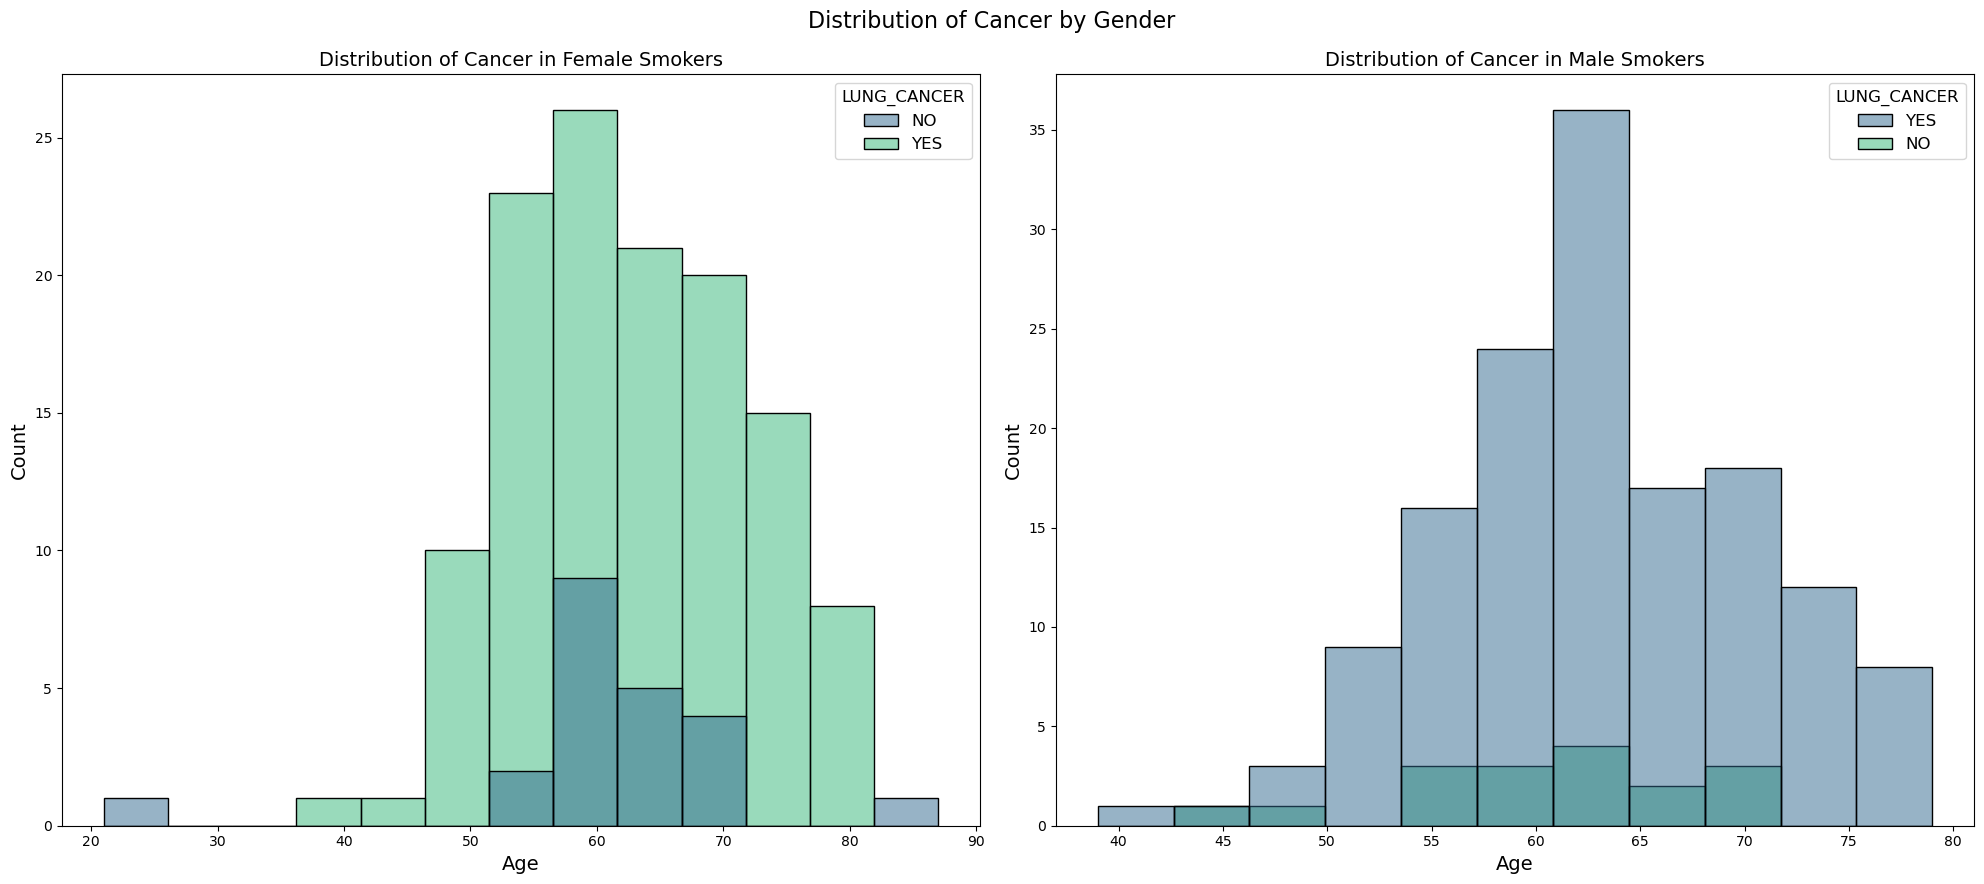

In [10]:
# Segregate data based on gender
cancer_in_males = cancer_df[cancer_df["GENDER"] == 'M']
cancer_in_females = cancer_df[cancer_df['GENDER'] == 'F']

# Create a figure with subplots
plt.figure(figsize=(20, 9))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,9))

# Plot for females
sns.histplot(data=cancer_in_females, x='AGE', hue='LUNG_CANCER', palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Cancer in Female Smokers')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot for males
sns.histplot(data=cancer_in_males, x='AGE', hue='LUNG_CANCER', palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Cancer in Male Smokers')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Add an overall title
plt.suptitle('Distribution of Cancer by Gender', fontsize=16)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



In [11]:
# Encoding our categorical variables for training
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columnns_to_transform = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']
for col in columnns_to_transform:
    if col in cancer_df.columns and not cancer_df[col].isnull().all():
        cancer_df[col] = le.fit_transform(cancer_df[col].astype(str))

cancer_df.head(10)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
5,0,75,0,1,0,0,1,1,1,1,0,1,1,0,0,1
6,1,52,1,0,0,0,0,1,0,1,1,1,1,0,1,1
7,0,51,1,1,1,1,0,1,1,0,0,0,1,1,0,1
8,0,68,1,0,1,0,0,1,0,0,0,0,0,0,0,0
9,1,53,1,1,1,1,1,0,1,0,1,0,0,1,1,1


### Correlation of features with Lung cancer

In [23]:
for cols in cancer_df.columns:
    print(f'\n Correlation co-efficient of {cols}:', {cancer_df['LUNG_CANCER'].corr(cancer_df[cols])})


 Correlation co-efficient of GENDER: {0.06725417467830659}

 Correlation co-efficient of AGE: {0.08946457606623369}

 Correlation co-efficient of SMOKING: {0.05817888585203872}

 Correlation co-efficient of YELLOW_FINGERS: {0.1813389627106576}

 Correlation co-efficient of ANXIETY: {0.14494713288731198}

 Correlation co-efficient of PEER_PRESSURE: {0.18638763171540654}

 Correlation co-efficient of CHRONIC DISEASE: {0.11089109464241381}

 Correlation co-efficient of FATIGUE : {0.15067295875611647}

 Correlation co-efficient of ALLERGY : {0.32776564628440186}

 Correlation co-efficient of WHEEZING: {0.2492999598990599}

 Correlation co-efficient of ALCOHOL CONSUMING: {0.28853280309173096}

 Correlation co-efficient of COUGHING: {0.24857008084596405}

 Correlation co-efficient of SHORTNESS OF BREATH: {0.06073844947572169}

 Correlation co-efficient of SWALLOWING DIFFICULTY: {0.2597297581612816}

 Correlation co-efficient of CHEST PAIN: {0.1904506951100535}

 Correlation co-efficient of 

Text(0.5, 1.0, 'Correlation Matrix')

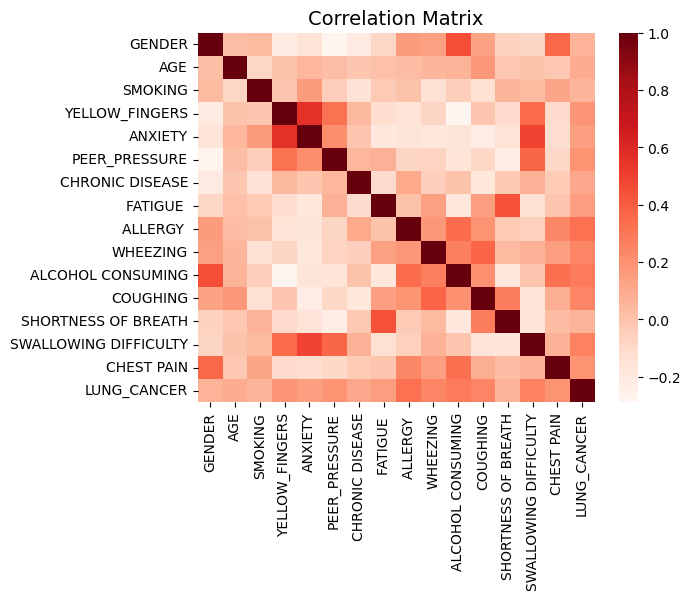

In [25]:
sns.heatmap(cancer_df.corr(), cmap='Reds')
plt.title('Correlation Matrix')

### Machine Learning 

In [26]:
# Split our data into features and target variables
y = cancer_df['LUNG_CANCER']
x = cancer_df.drop(columns=['LUNG_CANCER', ])


In [ ]:
# Import necessary machine learning libraries and functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import math


math.sqrt(len(y))

17.578395831246947

In [28]:
#splitting our data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
models = {
    'Logistic Regression': LogisticRegression(C=100, solver='liblinear'),
    'Support Vector Classifier': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Tree': ExtraTreeClassifier(),
    'K-Neighbors': KNeighborsClassifier(n_neighbors= 9, p=2, metric='euclidean'),
    'Naive Bayes': GaussianNB()
}

In [44]:
# 4. Cross-validation and Training
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, x_train, y_train, cv=4)
    model.fit(x_train, y_train)  # Training the model
    y_test_pred = model.predict(x_test)  # Prediction on test set
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"Confusion Matrix {cm}")

    # Store Results
    results[name] = {
        'accuracy': accuracy_score(y_test, y_test_pred),
        'cv_score_mean': cv_scores.mean(),
        'classification_report': classification_report(y_test, y_test_pred)
    }

Confusion Matrix [[ 5  2]
 [ 0 86]]
Confusion Matrix [[ 0  7]
 [ 0 86]]
Confusion Matrix [[ 5  2]
 [ 1 85]]
Confusion Matrix [[ 4  3]
 [ 1 85]]
Confusion Matrix [[ 4  3]
 [ 0 86]]
Confusion Matrix [[ 5  2]
 [ 6 80]]
Confusion Matrix [[ 6  1]
 [ 2 84]]
Confusion Matrix [[ 2  5]
 [ 1 85]]
Confusion Matrix [[ 4  3]
 [ 1 85]]


In [39]:
# Display the results in a structured format
result_df = pd.DataFrame(results).T

In [ ]:
# Display the accuracy and CV score alone
result_df.drop(columns='classification_report')

,accuracy,cv_score_mean
Logistic Regression,0.978495,0.898148
Support Vector Classifier,0.924731,0.851852
Random Forest,0.967742,0.875
Gradient Boosting,0.956989,0.856481
AdaBoost,0.967742,0.875
Decision Tree,0.935484,0.833333
Extra Tree,0.935484,0.865741
K-Neighbors,0.935484,0.861111
Naive Bayes,0.956989,0.893519


In [46]:
# 5. Display Results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Cross-Validation Mean Accuracy: {result['cv_score_mean']}")
    print(f"Test Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print('-' * 50)

Model: Logistic Regression
Cross-Validation Mean Accuracy: 0.8981481481481483
Test Accuracy: 0.978494623655914
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.98      1.00      0.99        86

    accuracy                           0.98        93
   macro avg       0.99      0.86      0.91        93
weighted avg       0.98      0.98      0.98        93

--------------------------------------------------
Model: Support Vector Classifier
Cross-Validation Mean Accuracy: 0.8518518518518519
Test Accuracy: 0.9247311827956989
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.92      1.00      0.96        86

    accuracy                           0.92        93
   macro avg       0.46      0.50      0.48        93
weighted avg       0.86      0.92      0.89        93

--------------------